In [3]:
## 🌦️ Project Purpose

##This project goes beyond just forecasting temperature. It aims to **help people detect unusual or extreme patterns in daily weather** — acting as an early signal for days that might require extra caution or preparedness.

##By neural networks to analyze historical weather data, the model can detect trends and forecast upcoming conditions. This information could assist in:
##- Planning travel or outdoor events
##- Anticipating unusual temperature spikes or drops
##- Supporting decision-making in sensitive environments (schools, construction, elderly care, etc.)

!pip install --upgrade tensorflow

import pandas as pd
df = pd.read_csv("Daily_Weather_Data.csv")
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc= True)
df.set_index('Formatted Date', inplace = True)
df.sort_index(inplace = True)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,0,1016.660000
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,0,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,0,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,0,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,0,981.770833


In [4]:
df = pd.read_csv("Daily_Weather_Data.csv")
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.set_index('Formatted Date', inplace=True)
df.sort_index(inplace=True)

# Resample to daily average
df_daily = df.resample('D').mean()


In [5]:
from sklearn.preprocessing import MinMaxScaler
visibility = df[['Visibility (km)']].copy()

scaler = MinMaxScaler()
visibility_scaled = scaler.fit_transform(visibility)

print(visibility_scaled[:5])



[[0.62681663]
 [0.71262479]
 [0.53325751]
 [0.57921564]
 [0.52449556]]


In [6]:
import numpy as np
def create_sequences(data, window_size=7):
    X,y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)
X, y = create_sequences(visibility_scaled, window_size=7)

print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (4012, 7, 1)
Y shape: (4012, 1)


In [7]:
split_index = int(0.8*len(X))
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (3209, 7, 1)
y_train: (3209, 1)
X_test: (803, 7, 1)
y_test: (803, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units =50, activation = 'tanh', input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer ='adam', loss ='mse')
history = model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/20


C:\Users\omar7\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1639 - val_loss: 0.0374
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - val_loss: 0.0361
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - val_loss: 0.0348
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - val_loss: 0.0333
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - val_loss: 0.0323
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - val_loss: 0.0308
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - val_loss: 0.0297
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - val_loss: 0.0286
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - val_loss: 0.0280
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0170 - val_loss: 0.0267
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - val_loss: 0.0262
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


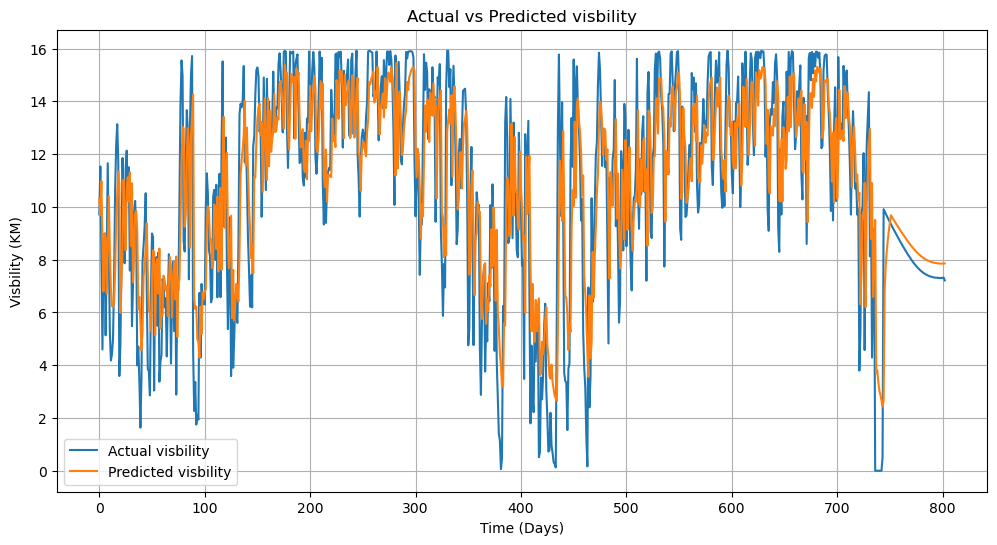

In [9]:
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual visbility")
plt.plot(y_pred_inv, label="Predicted visbility")
plt.title("Actual vs Predicted visbility")
plt.xlabel("Time (Days)")
plt.ylabel("Visbility (KM)")
plt.legend()
plt.grid(True)
plt.show()


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test, y_pred_esn)
r2_lstm = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:",mse)
print("LSTM R² Score:", r2_lstm)

RMSE: 2.3738931862662365
MAE: 1.8319884099818855
MSE: 0.022006857341455015
LSTM R² Score: 0.656988383288003


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))



In [ ]:
model.save("Machine_learning.keras")


In [ ]:
threshold = 3.0  # define your own logic
anomalies = np.abs(y_pred_inv - y_test_inv) > threshold
print("⚠️ Unusual days detected:", np.sum(anomalies))


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

# Bi-LSTM Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(units=50, activation='tanh'), input_shape=(X_train.shape[1], X_train.shape[2])))
bi_lstm_model.add(Dropout(0.2))
bi_lstm_model.add(Dense(1))

bi_lstm_model.compile(optimizer='adam', loss='mse')

# Training
history_bi_lstm = bi_lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluation
loss_bi_lstm = bi_lstm_model.evaluate(X_test, y_test)
print("Bi-LSTM Test Loss (MSE):", loss_bi_lstm)



Epoch 1/20


C:\Users\omar7\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1189 - val_loss: 0.0360
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - val_loss: 0.0353
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - val_loss: 0.0337
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - val_loss: 0.0318
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - val_loss: 0.0309
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - val_loss: 0.0296
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - val_loss: 0.0281
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - val_loss: 0.0272
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - val_loss: 0.0270
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - val_loss: 0.0261
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - val_loss: 0.0263
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [44]:
import numpy as np

class SimpleESN:
    def __init__(self, input_dim, reservoir_size=100, spectral_radius=0.95, sparsity=0.2):
        self.input_dim = input_dim
        self.reservoir_size = reservoir_size
        self.spectral_radius = spectral_radius
        self.sparsity = sparsity

        # Initialize weights
        self.Win = np.random.rand(reservoir_size, input_dim) * 2 - 1
        W = np.random.rand(reservoir_size, reservoir_size) - 0.5
        W[np.random.rand(*W.shape) > sparsity] = 0
        radius = np.max(np.abs(np.linalg.eigvals(W)))
        self.W = W * (spectral_radius / radius)

    def _update(self, state, u):
        return np.tanh(np.dot(self.Win, u) + np.dot(self.W, state))

    def fit(self, X, y):
        X = X.squeeze()
        states = []
        state = np.zeros(self.reservoir_size)

        for i in range(len(X)):
            state = self._update(state, X[i])
            states.append(state)

        states = np.vstack(states)
        self.Wout = np.linalg.pinv(states).dot(y)
        return self

    def predict(self, X):
        X = X.squeeze()
        states = []
        state = np.zeros(self.reservoir_size)

        for i in range(len(X)):
            state = self._update(state, X[i])
            states.append(state)

        states = np.vstack(states)
        return states.dot(self.Wout)



In [46]:
# Reshape for ESN
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Train and predict
esn = SimpleESN(input_dim=X_train_flat.shape[1], reservoir_size=100)
esn.fit(X_train_flat, y_train)
y_pred_esn = esn.predict(X_test_flat)

# Evaluate
from sklearn.metrics import mean_squared_error
mse_esn = mean_squared_error(y_test, y_pred_esn)
print("Echo State Network Test MSE:", mse_esn)


Echo State Network Test MSE: 0.023956586974692252


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


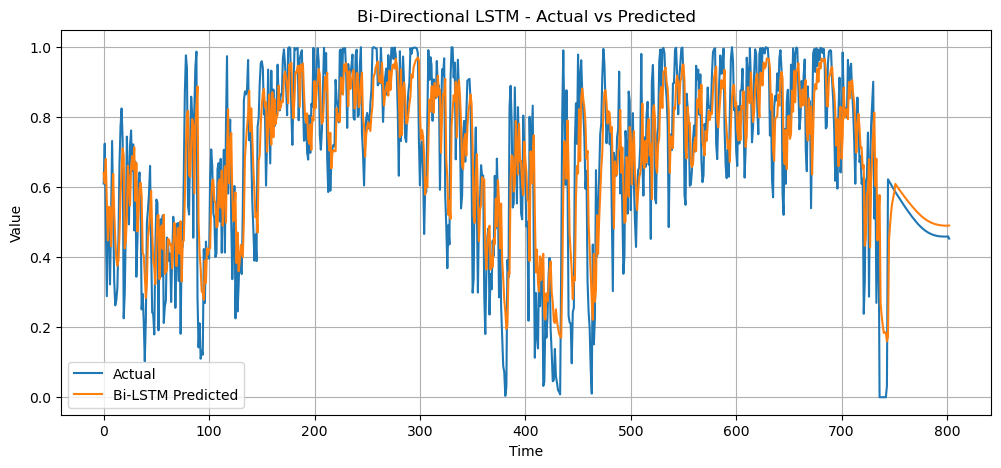

In [48]:
import matplotlib.pyplot as plt

# Bi-LSTM predictions
y_pred_bilstm = bi_lstm_model.predict(X_test)

# Plot actual vs predicted for Bi-LSTM
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='Bi-LSTM Predicted')
plt.title("Bi-Directional LSTM - Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



In [50]:
from sklearn.metrics import mean_squared_error

mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
print(f"Bi-LSTM Test MSE: {mse_bilstm:.4f}")

Bi-LSTM Test MSE: 0.0224


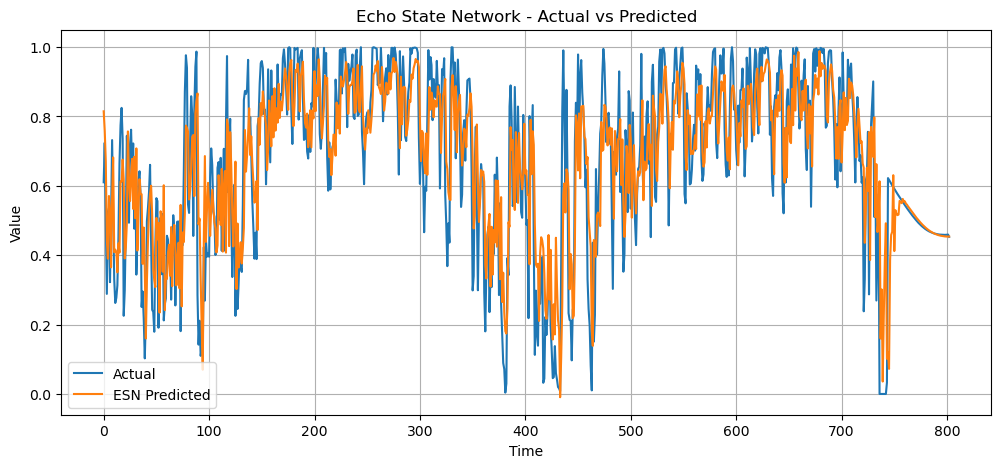

In [52]:

# Plot actual vs predicted for ESN
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_esn, label='ESN Predicted')
plt.title("Echo State Network - Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
mse_esn = mean_squared_error(y_test, y_pred_esn)
print(f"ESN Test MSE:     {mse_esn:.4f}")

ESN Test MSE:     0.0240


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [58]:
# Bi-LSTM metrics
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm = np.sqrt(mse_bilstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


# ESN metrics
mse_esn = mean_squared_error(y_test, y_pred_esn)
rmse_esn = np.sqrt(mse_esn)
mae_esn = mean_absolute_error(y_test, y_pred_esn)
r2_esn = r2_score(y_test, y_pred_esn)






In [60]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": ["LSTM","Bi-LSTM", "Echo State Network"],
    "RMSE": [rmse,rmse_bilstm, rmse_esn],
    "MAE": [mae,mae_bilstm, mae_esn],
    "MSE": [mse,mse_bilstm, mse_esn],
    "r2" : [r2_lstm,r2_bilstm,r2_esn]
})


print("Model Comparison:\n")
print(results_df)


Model Comparison:

                Model      RMSE       MAE       MSE        r2
0                LSTM  2.373893  1.831988  0.022007  0.656988
1             Bi-LSTM  0.149753  0.115750  0.022426  0.653830
2  Echo State Network  0.154779  0.117087  0.023957  0.630201


Model Comparison:

                Model      RMSE       MAE       MSE        r2
0                LSTM  2.373893  1.831988  0.022007  0.656988
1             Bi-LSTM  0.149753  0.115750  0.022426  0.653830
2  Echo State Network  0.154779  0.117087  0.023957  0.630201


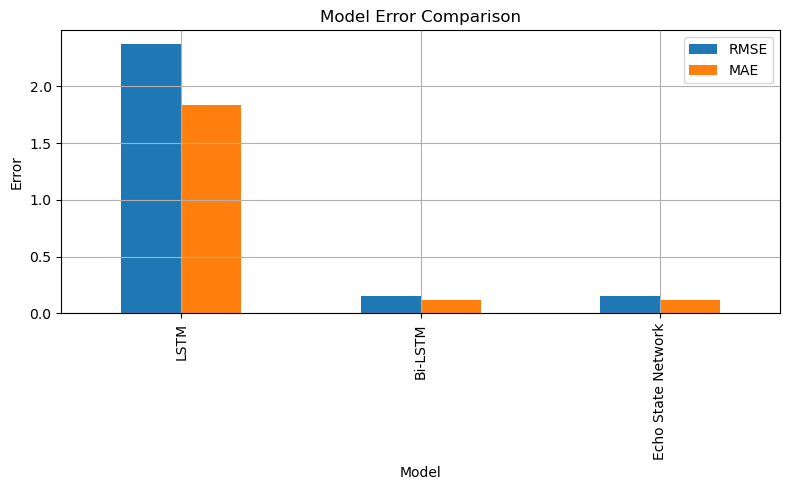

In [62]:
print("Model Comparison:\n")
print(results_df)

# Optional plot
results_df.set_index("Model")[["RMSE", "MAE"]].plot(kind="bar", figsize=(8, 5), title="Model Error Comparison", grid=True)
plt.ylabel("Error")
plt.tight_layout()
plt.show()
